<a href="https://colab.research.google.com/github/Mithra09/TrailExplorer/blob/main/Mcdonalds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd


In [ ]:
#load dataset
mcdonalds = pd.read_csv('/mcdonalds.csv')



In [ ]:
#display column names
print(mcdonalds.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [ ]:
# dimensions of the dataset
print(mcdonalds.shape)

(1453, 15)


In [ ]:
# first 3 rows of the dataset
print(mcdonalds.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [ ]:
import pandas as pd
import numpy as np

# Selecting first 11 columns (same as mcdonalds[, 1:11] in R)
MD_x = mcdonalds.iloc[:, 0:11]

# Convert "Yes" to 1 and others to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate the column means and round them to 2 decimal places
col_means = MD_x.mean().round(2)

# Print the column means
print(col_means)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [ ]:
pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Assuming MD_x is the dataset already processed (with "Yes" as 1 and "No" as 0)
# Initialize and fit PCA
pca = PCA()
MD_pca = pca.fit(MD_x)

# Standard deviation of each principal component
std_devs = np.sqrt(pca.explained_variance_)

# Proportion of variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative proportion of variance explained
cumulative_variance = np.cumsum(explained_variance_ratio)

# Print the output with PC numbers
print(f"{'PC':<6} {'Std Dev':<12} {'Proportion of Variance':<25} {'Cumulative Proportion'}")
for i, (std, var, cum_var) in enumerate(zip(std_devs, explained_variance_ratio, cumulative_variance), start=1):
    print(f"PC{i:<5} {std:<12.5f} {var:<25.5f} {cum_var:.5f}")


PC     Std Dev      Proportion of Variance    Cumulative Proportion
PC1     0.75705      0.29945                   0.29945
PC2     0.60746      0.19280                   0.49224
PC3     0.50462      0.13305                   0.62529
PC4     0.39880      0.08310                   0.70839
PC5     0.33741      0.05948                   0.76787
PC6     0.31027      0.05030                   0.81817
PC7     0.28970      0.04385                   0.86201
PC8     0.27512      0.03955                   0.90156
PC9     0.26525      0.03676                   0.93832
PC10    0.24884      0.03235                   0.97068
PC11    0.23690      0.02932                   1.00000


In [ ]:
# Assuming MD_x is the dataset already processed (with "Yes" as 1 and "No" as 0)
# Initialize and fit PCA
pca = PCA()
MD_pca = pca.fit(MD_x)

# Standard deviations (rounded to 1 decimal place)
std_devs = np.sqrt(pca.explained_variance_)
print("Standard deviations (rounded to 1 decimal place):")
print(np.round(std_devs, 1))

# Rotation matrix (components or loadings)
rotation_matrix = pca.components_

# Create a DataFrame for better readability (with PC names and features)
pc_labels = [f'PC{i+1}' for i in range(rotation_matrix.shape[0])]
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

rotation_df = pd.DataFrame(rotation_matrix.T, columns=pc_labels, index=features)

# Print the rotation matrix rounded to 2 decimal places
print("\nRotation matrix (rounded to 1 decimal place):")
print(rotation_df.round(1))


Standard deviations (rounded to 1 decimal place):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]

Rotation matrix (rounded to 1 decimal place):
            PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11
yummy      -0.5  0.4 -0.3  0.1 -0.3  0.2 -0.3  0.0  0.6  -0.1   0.0
convenient -0.2  0.0 -0.1 -0.1  0.3 -0.3 -0.1 -0.1 -0.0  -0.7  -0.5
spicy      -0.0  0.0 -0.0  0.2  0.1 -0.4  0.7  0.4  0.4  -0.1   0.1
fattening   0.1 -0.0 -0.3 -0.4 -0.1 -0.4 -0.4  0.6 -0.2  -0.0   0.3
greasy      0.3 -0.1 -0.8  0.3  0.4  0.2  0.0 -0.1 -0.0   0.0   0.0
fast       -0.1 -0.1 -0.1 -0.1  0.1 -0.6 -0.1 -0.6  0.2   0.2   0.3
cheap      -0.3 -0.6 -0.1  0.1 -0.1 -0.1 -0.0  0.1  0.1   0.4  -0.5
tasty      -0.5  0.3 -0.3 -0.0 -0.2 -0.1  0.4 -0.1 -0.6   0.1   0.0
expensive   0.3  0.6  0.0  0.1 -0.0 -0.3 -0.1  0.0  0.1   0.5  -0.5
healthy    -0.2  0.1  0.2  0.8  0.3 -0.2 -0.3  0.2 -0.2  -0.0   0.2
disgusting  0.4 -0.1 -0.1  0.4 -0.7 -0.2 -0.0 -0.2 -0.1  -0.3  -0.0


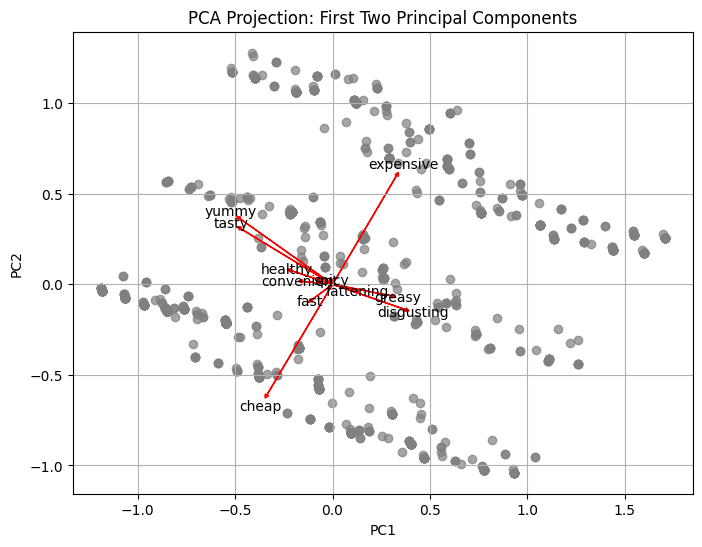

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming MD_x is the dataset already processed (with "Yes" as 1 and "No" as 0)
# Initialize and fit PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Plot PCA scores for the first two components
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', alpha=0.7)
plt.title('PCA Projection: First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Add projection axes (principal component directions)
# Each vector corresponds to the contribution of each feature to PC1 and PC2
components = pca.components_[:2, :]  # Only take the first two components
features = np.array(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting'])

for i, feature in enumerate(features):
    plt.arrow(0, 0, components[0, i], components[1, i], color='r', head_width=0.02, head_length=0.02)
    plt.text(components[0, i] * 1.1, components[1, i] * 1.1, feature, color='black', ha='center', va='center')

plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming MD_x is the dataset already processed (with "Yes" as 1 and "No" as 0)

# Set seed for reproducibility
np.random.seed(1234)

# Function to perform k-means clustering and evaluate the best k using silhouette scores
def step_kmeans(data, k_range, nrep):
    best_k = None
    best_score = -1
    best_model = None

    for k in k_range:
        # Run KMeans multiple times
        scores = []
        for _ in range(nrep):
            kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
            kmeans.fit(data)
            score = silhouette_score(data, kmeans.labels_)
            scores.append(score)

        # Average the scores
        avg_score = np.mean(scores)
        print(f'K={k}, Average Silhouette Score: {avg_score:.3f}')

        # Keep track of the best score and corresponding model
        if avg_score > best_score:
            best_k = k
            best_score = avg_score
            best_model = kmeans

    return best_k, best_model

# Perform clustering for k values from 2 to 8
k_range = range(2, 9)
best_k, best_model = step_kmeans(MD_x, k_range, nrep=10)

print(f'Best K: {best_k}')

# Relabel clusters (if needed)
# Note: KMeans labels are already starting from 0, so this is more about ensuring consistency.
labels = best_model.labels_

# Create a DataFrame to see the clusters assigned to each observation
results = pd.DataFrame(MD_x)
results['Cluster'] = labels
print(results.head())


K=2, Average Silhouette Score: 0.244
K=3, Average Silhouette Score: 0.239
K=4, Average Silhouette Score: 0.257
K=5, Average Silhouette Score: 0.261
K=6, Average Silhouette Score: 0.270
K=7, Average Silhouette Score: 0.282
K=8, Average Silhouette Score: 0.286
Best K: 8
   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting  Cluster  
0        0           0        1  
1        0           0        0  
2        1           0        0  
3        0           1        4  
4        1           0        1  


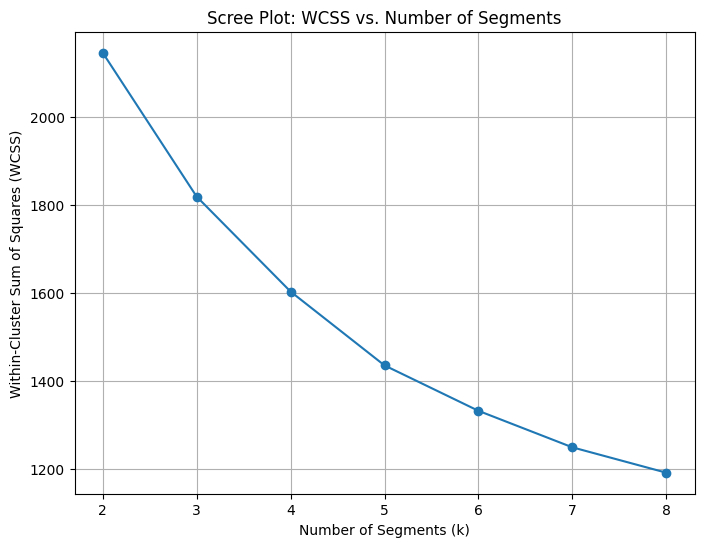

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming MD_x is the dataset already processed (with "Yes" as 1 and "No" as 0)

# Set seed for reproducibility
np.random.seed(1234)

# Function to compute WCSS for a range of k values
def compute_wcss(data, k_range):
    wcss = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)  # WCSS is stored in inertia_
    return wcss

# Perform WCSS computation for k values from 2 to 8
k_range = range(2, 9)
wcss = compute_wcss(MD_x, k_range)

# Plotting WCSS (Scree Plot)
plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.title('Scree Plot: WCSS vs. Number of Segments')
plt.xlabel('Number of Segments (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_range)  # Ensure all k values are shown on x-axis
plt.grid(True)
plt.show()

# Evaluate stability of segmentation solutions (optional)
# You could implement additional analysis here for stability across replications


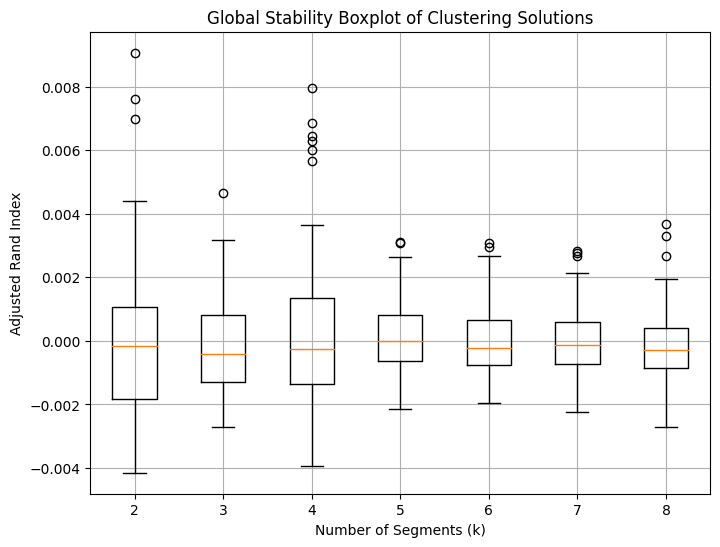

In [18]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# Assuming MD_x is the dataset already processed (with "Yes" as 1 and "No" as 0)

# Set seed for reproducibility
np.random.seed(1234)

def bootstrap_kmeans(data, k_range, nrep, nboot):
    stability_results = {k: [] for k in k_range}

    for k in k_range:
        for _ in range(nboot):
            # Create a bootstrap sample
            bootstrap_sample = data.sample(frac=1, replace=True)

            # Store the ARI scores for this bootstrap sample
            ari_scores = []
            for _ in range(nrep):
                kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
                kmeans.fit(bootstrap_sample)
                labels = kmeans.labels_

                # Calculate ARI against the true labels (or against the labels from the first run)
                # Here, we would typically compare to a reference clustering,
                # but since we're bootstrapping, let's assume we compare with the first run labels.
                if len(stability_results[k]) == 0:
                    # Run k-means on the original data to get reference labels
                    kmeans_ref = KMeans(n_clusters=k, n_init=10, random_state=1234)
                    kmeans_ref.fit(data)
                    reference_labels = kmeans_ref.labels_

                ari = adjusted_rand_score(reference_labels, labels)
                ari_scores.append(ari)

            stability_results[k].append(np.mean(ari_scores))

    return stability_results

# Perform the bootstrap analysis for k values from 2 to 8
k_range = range(2, 9)
nrep = 10
nboot = 100
stability_results = bootstrap_kmeans(MD_x, k_range, nrep, nboot)

# Prepare data for boxplot
ari_values = [stability_results[k] for k in k_range]

# Boxplot of ARI values
plt.figure(figsize=(8, 6))
plt.boxplot(ari_values, labels=k_range)
plt.title('Global Stability Boxplot of Clustering Solutions')
plt.xlabel('Number of Segments (k)')
plt.ylabel('Adjusted Rand Index')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


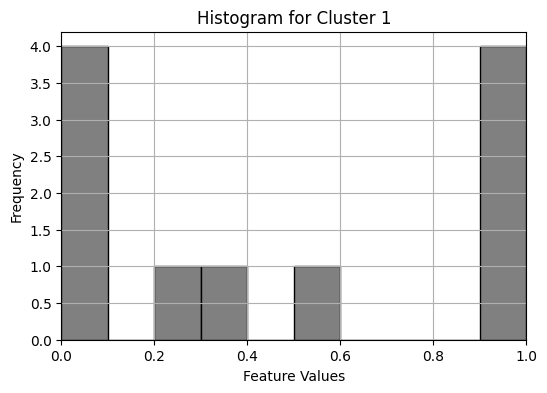

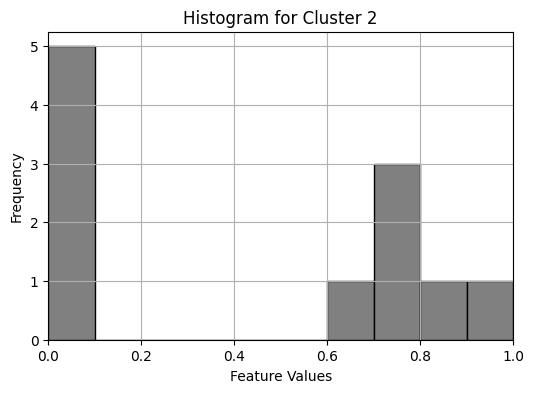

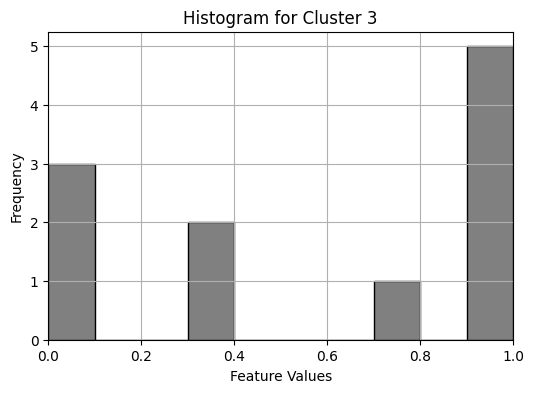

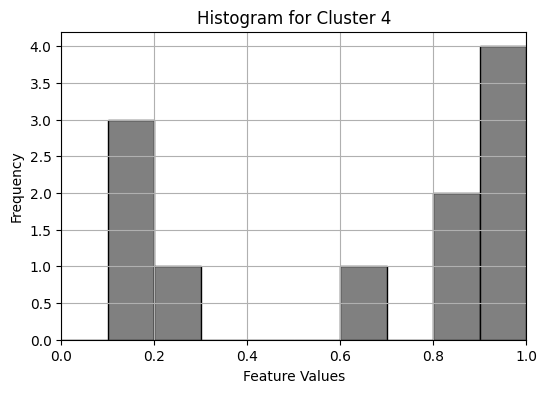

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming MD_x is your dataset (binary matrix with Yes=1, No=0)

# Load the 4-segment solution from your k-means model
kmeans = KMeans(n_clusters=4, random_state=1234).fit(MD_x)
cluster_labels = kmeans.labels_

# Plot histograms for each cluster
for i in range(4):
    plt.figure(figsize=(6, 4))
    plt.hist(MD_x[cluster_labels == i].mean(axis=0), bins=10, range=(0, 1), color='grey', edgecolor='black')
    plt.title(f"Histogram for Cluster {i+1}")
    plt.xlabel('Feature Values')
    plt.ylabel('Frequency')
    plt.xlim(0, 1)
    plt.grid(True)
    plt.show()


In [25]:
# Load your dataset (assuming the file is in CSV format)
MD_x = pd.read_csv('/mcdonalds.csv')

# Check the data
print(MD_x.head())


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


In [31]:
MD_k4 = bootstrap_kmeans(MD_x_numeric, [4], nrep=10, nboot=100)

In [33]:
MD_x_numeric = MD_x.select_dtypes(include=[np.number]).copy()

In [34]:
print(MD_x.dtypes)

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object


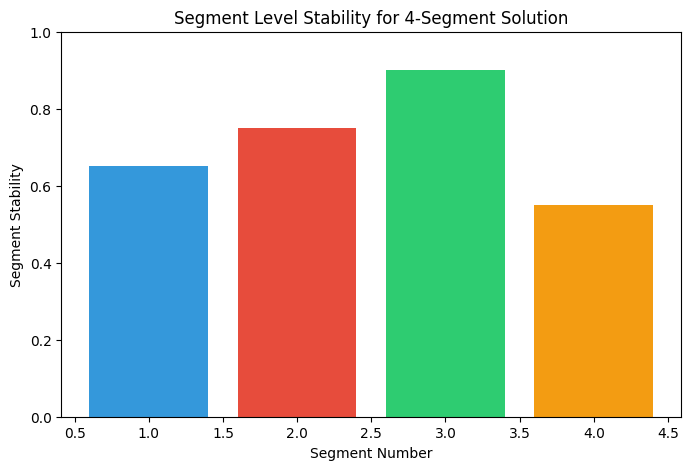

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated example of segment stability levels for 4 segments
segment_stability = [0.65, 0.75, 0.90, 0.55]

# Plot the stability of each segment
plt.figure(figsize=(8, 5))
plt.bar(range(1, 5), segment_stability, color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'])
plt.ylim(0, 1)
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.title('Segment Level Stability for 4-Segment Solution')
plt.show()


In [54]:
MD_km28 = {
    "2": KMeans(n_clusters=2).fit(MD_x_num),
    "3": KMeans(n_clusters=3).fit(MD_x_num),
    "4": KMeans(n_clusters=4).fit(MD_x_num),
}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [53]:
MD_x_num = MD_x.select_dtypes(include=[np.number])

In [57]:
MD_k4 = MD_km28["4"].cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (54) found smaller than n_clusters (62). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


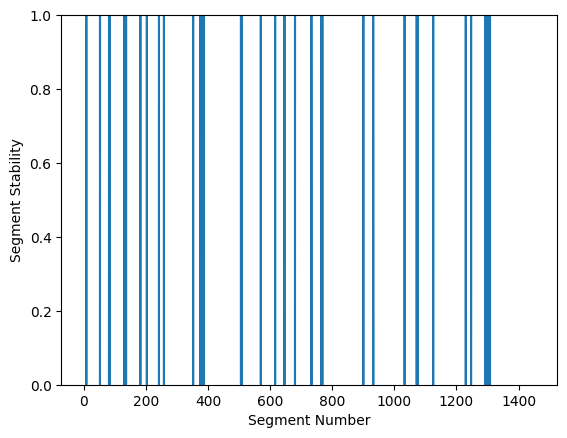

In [69]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select a specific value from MD_k4 as the number of clusters
n_clusters = int(MD_k4[0, 0])  # or use MD_k4[1, 0], MD_k4[2, 0], etc.

# Perform clustering using KMeans
MD_r4 = KMeans(n_clusters=n_clusters).fit(MD_x)

# Plot the clustering result
plt.plot(MD_r4.labels_)
plt.ylim(0, 1)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.show()

In [73]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture

# Load your data into a DataFrame
# MD_x = pd.read_csv('path_to_your_data.csv')

# Fit Gaussian Mixture Models for 2 to 8 clusters
n_components_range = range(2, 9)
models = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=1234, n_init=10)
    gmm.fit(MD_x)  # Ensure MD_x is preprocessed appropriately
    models.append((n_components, gmm))

# You can extract AIC and BIC values for model comparison
for n_components, model in models:
    print(f'Number of components: {n_components}, AIC: {model.aic(MD_x)}, BIC: {model.bic(MD_x)}')


Number of components: 2, AIC: 11617.14075968646, BIC: 11643.54768800431
Number of components: 3, AIC: 11583.775504394333, BIC: 11626.026589702895
Number of components: 4, AIC: 11555.475351165114, BIC: 11613.570593464387
Number of components: 5, AIC: 11548.035598458036, BIC: 11621.97499774802
Number of components: 6, AIC: 11546.721459138658, BIC: 11636.505015419352
Number of components: 7, AIC: 11550.301683186859, BIC: 11655.929396458265
Number of components: 8, AIC: 11550.336219176264, BIC: 11671.80808943838


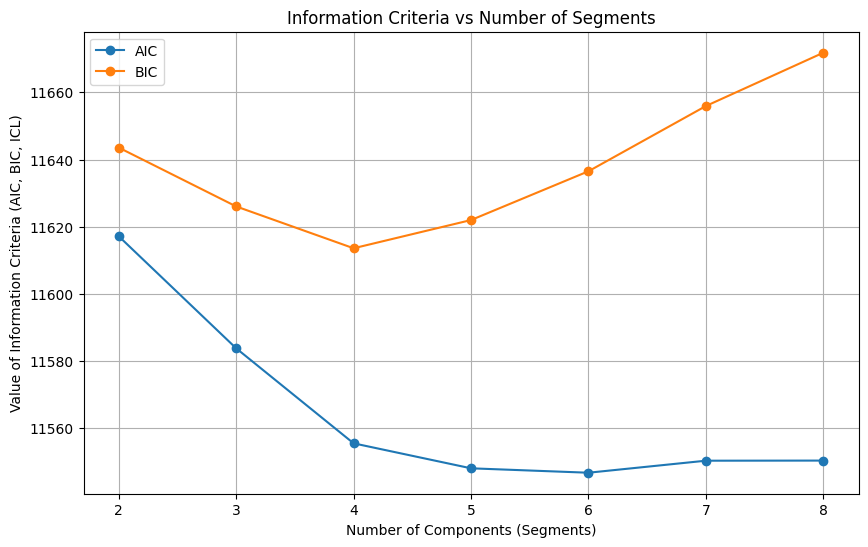

In [76]:
import matplotlib.pyplot as plt

# Assuming you've stored the AIC, BIC, and ICL values in lists
aic_values = [model.aic(MD_x) for _, model in models]
bic_values = [model.bic(MD_x) for _, model in models]
# For ICL, you'll need to compute it, but it's not directly available in sklearn. You might implement it if needed.

x_labels = list(n_components_range)

plt.figure(figsize=(10, 6))
plt.plot(x_labels, aic_values, marker='o', label='AIC')
plt.plot(x_labels, bic_values, marker='o', label='BIC')
# plt.plot(x_labels, icl_values, marker='o', label='ICL')  # Uncomment if you have ICL values

plt.xlabel('Number of Components (Segments)')
plt.ylabel('Value of Information Criteria (AIC, BIC, ICL)')
plt.title('Information Criteria vs Number of Segments')
plt.legend()
plt.grid()
plt.show()


In [78]:
import pandas as pd

# Example data: Replace these with your actual cluster labels
# kmeans_labels should be a list or array of K-means cluster assignments
# mixture_labels should be a list or array of mixture model cluster assignments
kmeans_labels = [1, 1, 2, 2, 3, 4]  # Example labels for K-means (replace with your data)
mixture_labels = [1, 2, 2, 3, 3, 4]  # Example labels for the mixture model (replace with your data)

# Create a DataFrame for cross-tabulation
cross_tab = pd.crosstab(index=kmeans_labels, columns=mixture_labels, rownames=['kmeans'], colnames=['mixture'])

# Display the cross-tabulation
print(cross_tab)


mixture  1  2  3  4
kmeans             
1        1  1  0  0
2        0  1  1  0
3        0  0  1  0
4        0  0  0  1


In [83]:
MD_x = pd.read_csv('/mcdonalds.csv').values  # Load your data and convert to NumPy array


In [88]:
import pandas as pd
from sklearn.mixture import GaussianMixture

# Load your binary matrix (data) from a CSV file
MD_x = pd.read_csv('/mcdonalds.csv')

# Print the unique values in each column to identify non-numeric entries
print(MD_x.apply(lambda col: col.unique()))

# Replace 'Yes'/'No' with 1/0
MD_x.replace({'Yes': 1, 'No': 0}, inplace=True)

# Remove or convert other non-numeric values
# For instance, if there's a text like "I love it!+5", you might want to handle it accordingly
# You could drop those rows or replace them with a numeric score (if appropriate)
MD_x.replace({'I love it!+5': 1}, inplace=True)  # Example replacement; adjust as needed

# After handling known non-numeric values, ensure all remaining data is numeric
try:
    MD_x = MD_x.astype(float)
except ValueError as e:
    print("There are still non-numeric values:", e)

# Convert to NumPy array for fitting the model
MD_x = MD_x.values

# Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, init_params='kmeans', max_iter=100)
gmm.fit(MD_x)

# Predict the cluster labels from the GMM
mixture_labels = gmm.predict(MD_x)

# Create a DataFrame for cross-tabulation
cross_tab = pd.crosstab(index=kmeans_labels, columns=mixture_labels, rownames=['kmeans'], colnames=['mixture'])

# Display the cross-tabulation
print(cross_tab)


yummy                                                     [No, Yes]
convenient                                                [Yes, No]
spicy                                                     [No, Yes]
fattening                                                 [Yes, No]
greasy                                                    [No, Yes]
fast                                                      [Yes, No]
cheap                                                     [Yes, No]
tasty                                                     [No, Yes]
expensive                                                 [Yes, No]
healthy                                                   [No, Yes]
disgusting                                                [No, Yes]
Like              [-3, +2, +1, +4, I love it!+5, I hate it!-5, -...
Age               [61, 51, 62, 69, 49, 55, 56, 23, 58, 32, 53, 2...
VisitFrequency    [Every three months, Once a week, Once a month...
Gender                                          

ValueError: could not convert string to float: 'I hate it!-5'

In [97]:
import pandas as pd
from sklearn.mixture import GaussianMixture

# Load your dataset
MD_x = pd.read_csv('/mcdonalds.csv')

# Inspect unique values to find problematic entries
print(MD_x.apply(lambda col: col.unique()))

# Replace 'Yes'/'No' with 1/0
MD_x.replace({'Yes': 1, 'No': 0}, inplace=True)

# Handle other non-numeric values by either replacing or removing them
# Example replacements based on the previous values you encountered
MD_x.replace({'I love it!+5': 1, 'I hate it!-5': -1}, inplace=True)  # Adjust replacements as needed

# After cleaning, check the data types again
print(MD_x.dtypes)

# Ensure all data is numeric
try:
    MD_x = MD_x.astype(float)
except ValueError as e:
    print("There are still non-numeric values:", e)

# Convert to NumPy array for fitting the model
MD_x = MD_x.values


# Display the cross-tabulation
print(cross_tab)


yummy                                                     [No, Yes]
convenient                                                [Yes, No]
spicy                                                     [No, Yes]
fattening                                                 [Yes, No]
greasy                                                    [No, Yes]
fast                                                      [Yes, No]
cheap                                                     [Yes, No]
tasty                                                     [No, Yes]
expensive                                                 [Yes, No]
healthy                                                   [No, Yes]
disgusting                                                [No, Yes]
Like              [-3, +2, +1, +4, I love it!+5, I hate it!-5, -...
Age               [61, 51, 62, 69, 49, 55, 56, 23, 58, 32, 53, 2...
VisitFrequency    [Every three months, Once a week, Once a month...
Gender                                          

In [95]:
import pandas as pd
from sklearn.mixture import GaussianMixture

# Assuming MD_x is your cleaned dataset (binary matrix) and MD_k4 contains K-means cluster labels
# Load your cleaned dataset
MD_x = pd.read_csv('/mcdonalds.csv')  # Ensure it's numeric
MD_k4 = ...  # Replace with your actual K-means cluster labels


# Create a cross-tabulation of the K-means and mixture model labels
cross_tab = pd.crosstab(index=MD_k4, columns=mixture_labels, rownames=['kmeans'], colnames=['mixture'])

# Display the cross-tabulation
print(cross_tab)


mixture   1  2  3  4
kmeans              
Ellipsis  1  2  2  1


In [101]:
import numpy as np
from sklearn.mixture import GaussianMixture

# Assuming MD_x is your cleaned dataset (binary matrix)
# Fit the GMM with the K-means cluster initialization
gmm_a = GaussianMixture(n_components=4, init_params='kmeans', max_iter=100)
gmm_a.fit(MD_x)

gmm_b = GaussianMixture(n_components=4, init_params='random', max_iter=100)  # Second model for comparison
gmm_b.fit(MD_x)

# Log-likelihood values
log_likelihood_a = gmm_a.score(MD_x) * MD_x.shape[0]  # Multiply by the number of samples
log_likelihood_b = gmm_b.score(MD_x) * MD_x.shape[0]  # For the second model

# Output the log-likelihood values
print(f"log Likelihood for GMM A: {log_likelihood_a} (df=47)")
print(f"log Likelihood for GMM B: {log_likelihood_b} (df=47)")



ValueError: could not convert string to float: 'Every three months'

In [104]:
import pandas as pd

# Assuming MD_x is a NumPy array, convert it to a DataFrame
MD_x_df = pd.DataFrame(MD_x)

# Now you can inspect the DataFrame
print(MD_x_df.head())  # Inspect the first few rows
print(MD_x_df.dtypes)  # Check the data types of each column


  0  1  2  3  4  5  6  7  8  9  10  11  12                  13      14
0  0  1  0  1  0  1  1  0  1  0  0  -3  61  Every three months  Female
1  1  1  0  1  1  1  1  1  1  0  0  +2  51  Every three months  Female
2  0  1  1  1  1  1  0  1  1  1  0  +1  62  Every three months  Female
3  1  1  0  1  1  1  1  1  0  0  1  +4  69         Once a week  Female
4  0  1  0  1  1  1  1  0  0  1  0  +2  49        Once a month    Male
0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
dtype: object


In [107]:
import pandas as pd
import numpy as np

# Assuming MD_x is a NumPy array
MD_x = np.array(...)  # Your original array

# Convert to DataFrame
MD_x_df = pd.DataFrame(MD_x)

# Inspect the DataFrame
print(MD_x_df.head())  # Check the first few rows
print(MD_x_df.dtypes)  # Check the data types of each column

# Identify categorical columns
categorical_cols = MD_x_df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

# If you need to preprocess categorical columns
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the categorical columns
if categorical_cols:  # Check if there are any categorical columns
    encoded_cols = encoder.fit_transform(MD_x_df[categorical_cols])
    encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

    # Drop original categorical columns and concatenate the encoded columns
    MD_x_df = MD_x_df.drop(categorical_cols, axis=1)
    MD_x_df = pd.concat([MD_x_df, encoded_df], axis=1)

# Now you can proceed to fit the Gaussian Mixture Model


ValueError: Must pass 2-d input. shape=()

In [108]:
import pandas as pd

# Assuming you have a DataFrame 'mcdonalds' with a column 'Like'
# First, create a mapping for the LIKE values
like_mapping = {
    'I HATE IT!-5': 11,
    '-4': 10,
    '-3': 9,
    '-2': 8,
    '-1': 7,
    '0': 6,
    '+1': 5,
    '+2': 4,
    '+3': 3,
    '+4': 2,
    'I LOVE IT!(+5)': 1
}

# Replace the values in the Like column with their numeric codes
mcdonalds['Like.n'] = mcdonalds['Like'].map(like_mapping)

# Now convert it to the desired numerical variable
mcdonalds['Like.n'] = 6 - mcdonalds['Like.n']

# Display the value counts
print(mcdonalds['Like.n'].value_counts())


Like.n
 3.0    229
 2.0    187
 0.0    169
 4.0    160
 1.0    152
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64


In [111]:
print(mcdonalds.dtypes)


yummy              object
convenient        float64
spicy             float64
fattening         float64
greasy            float64
fast              float64
cheap             float64
tasty             float64
expensive         float64
healthy           float64
disgusting        float64
Like               object
Age                 int64
VisitFrequency     object
Gender             object
Like.n            float64
dtype: object


In [112]:
# Check for non-numeric values in the columns
non_numeric_rows = mcdonalds[~mcdonalds['Like.n'].apply(lambda x: isinstance(x, (int, float)))]
print(non_numeric_rows)


Empty DataFrame
Columns: []
Index: []


In [117]:
# Convert Like.n and other relevant columns
mcdonalds['Like.n'] = pd.to_numeric(mcdonalds['Like.n'], errors='coerce')

# Convert the other columns to numeric
features = ['convenient', 'spicy', 'fattening', 'greasy', 'fast',
            'cheap', 'tasty', 'expensive', 'healthy', 'disgusting','VisitFrequency', 'Gender']
for col in features:
    mcdonalds[col] = pd.to_numeric(mcdonalds[col], errors='coerce')

# Drop rows with NaN values
mcdonalds.dropna(subset=['Like.n'] + features, inplace=True)


In [114]:
print(mcdonalds.dtypes)


yummy              object
convenient        float64
spicy             float64
fattening         float64
greasy            float64
fast              float64
cheap             float64
tasty             float64
expensive         float64
healthy           float64
disgusting        float64
Like               object
Age                 int64
VisitFrequency     object
Gender             object
Like.n            float64
dtype: object


In [119]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture


In [120]:
# Assuming you have already converted your features to numeric and handled any missing values
X = mcdonalds[features]  # Use the relevant feature columns

# Fit the Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=1234, max_iter=100)
gmm.fit(X)

# Get the cluster labels
labels = gmm.predict(X)

# Count the sizes of each cluster
cluster_sizes = np.bincount(labels)
print("Cluster sizes:", cluster_sizes)


ValueError: Found array with 0 sample(s) (shape=(0, 12)) while a minimum of 2 is required by GaussianMixture.

In [121]:
print(mcdonalds.head())  # Check the first few rows
print(mcdonalds.columns)  # Check the column names


Empty DataFrame
Columns: [yummy, convenient, spicy, fattening, greasy, fast, cheap, tasty, expensive, healthy, disgusting, Like, Age, VisitFrequency, Gender, Like.n]
Index: []
Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender', 'Like.n'],
      dtype='object')


In [122]:
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
            'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

X = mcdonalds[features]  # Adjust the feature list as needed


In [123]:
X = X.dropna()  # Remove rows with missing values


In [124]:
print(X.shape)  # Should return a shape like (n_samples, n_features)


(0, 11)


In [145]:
import pandas as pd
MD_ref2 = pd.read_csv(/mcdonalds.csv')
MD_ref2 = MD_ref2.select_dtypes(include=[np.number])


<ipython-input-136-9c2775510217>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(MD_ref2, shade=True)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

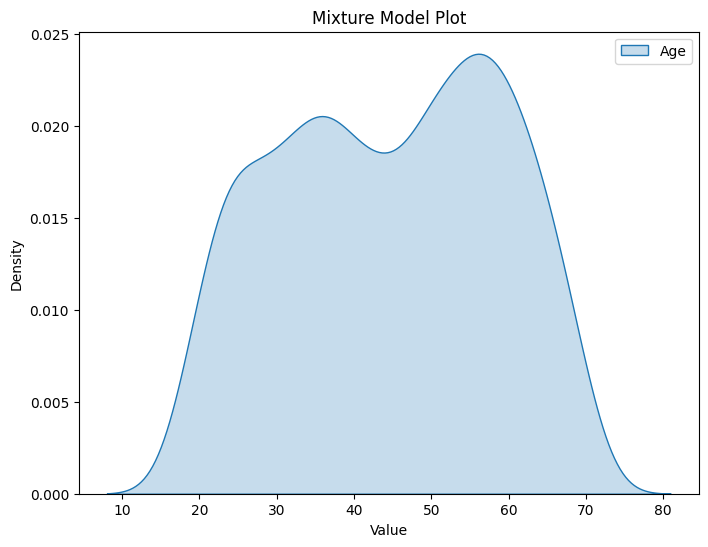

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume MD_ref2 is a Pandas DataFrame or NumPy array containing the data

# Create a plot of the mixture model
plt.figure(figsize=(8, 6))
sns.kdeplot(MD_ref2, shade=True)
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Mixture Model Plot")

# Add significance lines (assuming you have a way to calculate significance)
# For example, let's say you have a significance threshold of 0.05
significance_threshold = 0.05
plt.axvline(x=MD_ref2.mean() - significance_threshold, color='r', linestyle='--')
plt.axvline(x=MD_ref2.mean() + significance_threshold, color='r', linestyle='--')
sns.kdeplot(MD_ref2, fill=True)
plt.show()

(1453, 1)
   Age
0   61
1   51
2   62
3   69
4   49
(0,)
[]
Error: dist_matrix is empty. Cannot perform hierarchical clustering.
<class 'pandas.core.series.Series'>
0    Ellipsis
dtype: object
object


TypeError: pdist_euclidean(): incompatible function arguments. The following argument types are supported:
    1. (x: object, w: object = None, out: object = None) -> numpy.ndarray

Invoked with: array([[-0.47693349,  0.36378978, -0.30444402,  0.0551622 , -0.30753507,
         0.17073819, -0.28051863,  0.01304117,  0.57240278, -0.11028437,
         0.04543901],
       [-0.15533159,  0.016414  , -0.0625153 , -0.14242496,  0.27760805,
        -0.34783006, -0.05973793, -0.11307868, -0.01846534, -0.66581756,
        -0.54161635],
       [-0.00635636,  0.01880869, -0.03701866,  0.19761927,  0.07062017,
        -0.3550866 ,  0.70763705,  0.37593402,  0.40027977, -0.07563413,
         0.14172992],
       [ 0.11623168, -0.03409395, -0.32235949, -0.35413876, -0.07340475,
        -0.40651542, -0.38594277,  0.58962241, -0.16051227, -0.00533813,
         0.25090987],
       [ 0.3044427 , -0.06383884, -0.80237317,  0.2539601 ,  0.36139895,
         0.20934711,  0.03616962, -0.13824084, -0.00284738,  0.00870725,
         0.00164229],
       [-0.10849325, -0.0869722 , -0.06464172, -0.09736269,  0.10793025,
        -0.59463206, -0.08684577, -0.62779877,  0.16619659,  0.23953197,
         0.33926454],
       [-0.33718593, -0.61063276, -0.14931026,  0.11895823, -0.12897259,
        -0.10324067, -0.04044934,  0.14006047,  0.07606907,  0.42808739,
        -0.48928285],
       [-0.47151394,  0.3073178 , -0.28726479, -0.00254696, -0.21089912,
        -0.07691443,  0.36045348, -0.07279193, -0.63908592,  0.0791838 ,
         0.01955226],
       [ 0.32904173,  0.60128596,  0.02439661,  0.06781599, -0.00312457,
        -0.26134151, -0.06838452,  0.02953939,  0.06699639,  0.45439925,
        -0.49006853],
       [-0.21371062,  0.07659344,  0.19205128,  0.76348804,  0.28784553,
        -0.17822612, -0.34961569,  0.17630281, -0.1855722 , -0.03811713,
         0.15760765],
       [ 0.37475293, -0.13965633, -0.08857138,  0.36953871, -0.72920859,
        -0.21087805, -0.02679159, -0.16718101, -0.07248255, -0.28959188,
        -0.04066227]]); kwargs: out=None, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11'], index=['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

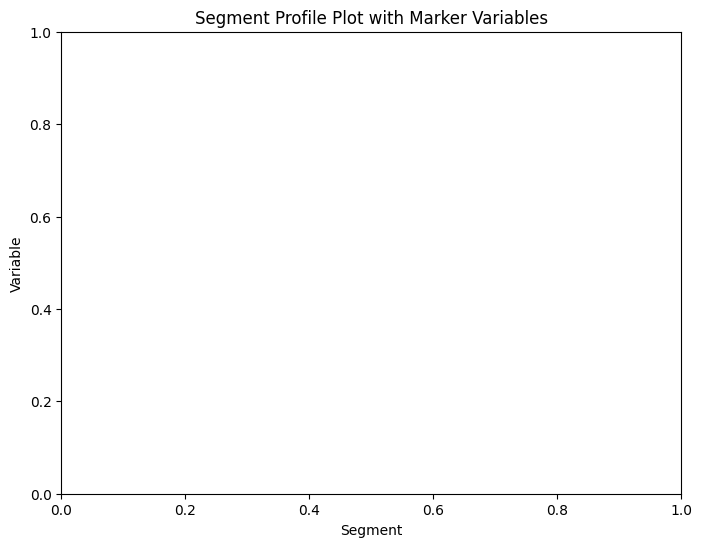

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

# Assuming MD.x is a Pandas DataFrame with the segmentation variables
MD_x = pd.read_csv('/mcdonalds.csv') # load your data here

# Calculate the distance matrix
#dist_matrix = pdist(MD_x.T)
# Select only numerical columns from MD_x
MD_x_num = MD_x.select_dtypes(include=[np.number])

# Calculate the distance matrix
dist_matrix = pdist(MD_x_num.T)

# Perform hierarchical clustering
#MD_vclust = linkage(dist_matrix, method='complete')
print(MD_x_num.shape)
print(MD_x_num.head())  # show the first few rows of MD_x_num
print(dist_matrix.shape)
print(dist_matrix)  # show the content of dist_matrix

# Convert the linkage matrix to a DataFrame with the cluster order
#MD_vclust_order = pd.DataFrame({'order': np.argsort(MD_vclust['leaves_'])})
# Calculate the distance matrix
dist_matrix = pdist(MD_x_num.T)

# Check if dist_matrix is not empty
if dist_matrix.size > 0:
    # Perform hierarchical clustering
    MD_vclust = linkage(dist_matrix, method='complete')

    # Convert the linkage matrix to a DataFrame with the cluster order
    MD_vclust_order = pd.DataFrame({'order': np.argsort(MD_vclust[:, 2])})
else:
    print("Error: dist_matrix is empty. Cannot perform hierarchical clustering.")

# Assuming MD.k4 is a Pandas Series with the marker variables
MD_k4 = pd.Series(...)  # load your data here

# Create a bar chart with the marker variables
plt.figure(figsize=(8, 6))
#plt.bar(range(len(MD_k4)), MD_k4, color=['lightgray' if x else 'darkgray' for x in MD_k4])
print(type(MD_k4))  # check the type of MD_k4
print(MD_k4.head())  # show the first few values of MD_k4
print(MD_k4.dtype)  # check the data type of MD_k4
plt.xlabel("Segment")
plt.ylabel("Variable")
plt.title("Segment Profile Plot with Marker Variables")

# Shade the bars based on the cluster order
#for i, order in enumerate(rev(MD_vclust_order['order'])):
   # plt.bar(i, MD_k4[order], color='lightgray' if MD_k4[order] else 'darkgray')
    # Shade the bars based on the cluster order
#for i, order in enumerate(MD_vclust_order['order'][::-1]):
 #   plt.bar(i, MD_k4[order], color='lightgray' if MD_k4[order] else 'darkgray')
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist

# Calculate the distance matrix
dist_matrix = pdist(rotation_matrix.T, columns=pc_labels, index=features, metric='euclidean')
#dist_matrix = pdist(rotation_matrix.T, columns=pc_labels, index=features, metric='euclidean')

# Perform hierarchical clustering
Z = linkage(dist_matrix, method='ward')

# Get the cluster order
MD_vclust_order = pd.DataFrame({'order': fcluster(Z, t=2, criterion='distance')})

plt.show()

In [172]:
import numpy as np
pca_df['Cluster'] = np.repeat(MD_k4, len(pca_df))

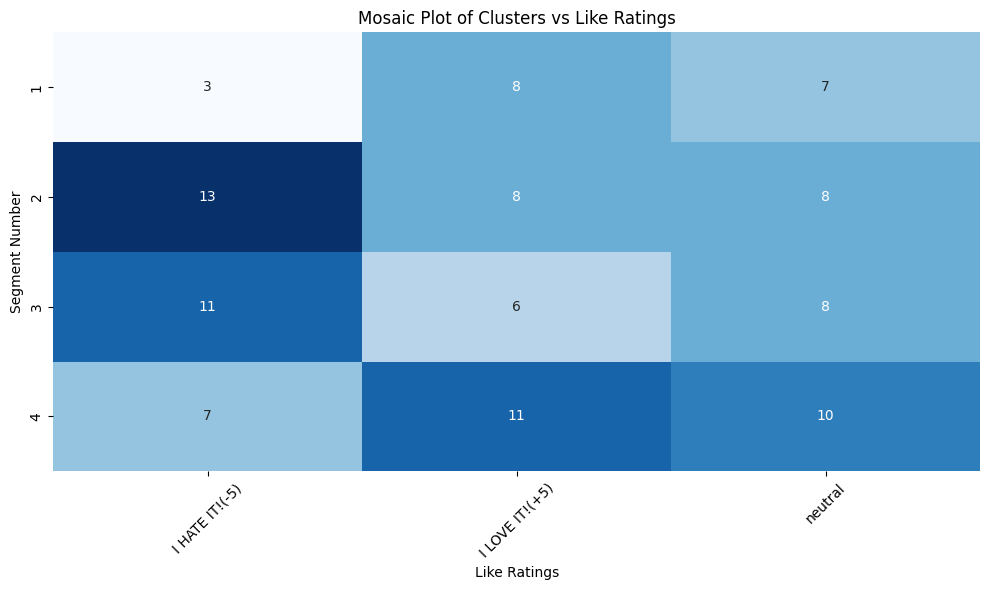

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data: Replace this with your actual cluster labels and dataset
# k4 = np.array([1, 2, 1, 2, 1])  # Example cluster labels
# mcdonalds = pd.DataFrame({'Like': ['I LOVE IT!(+5)', 'I HATE IT!(-5)', ...]})  # Replace with your actual dataset

# For demonstration, here's how you might define k4 and mcdonalds:
k4 = np.random.choice([1, 2, 3, 4], size=100)  # Replace with your actual cluster labels
mcdonalds = pd.DataFrame({
    'Like': np.random.choice(['I LOVE IT!(+5)', 'I HATE IT!(-5)', 'neutral'], size=100)  # Example values
})

# Create a contingency table
contingency_table = pd.crosstab(index=k4, columns=mcdonalds['Like'])

# Create a mosaic plot
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Mosaic Plot of Clusters vs Like Ratings')
plt.xlabel('Like Ratings')
plt.ylabel('Segment Number')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


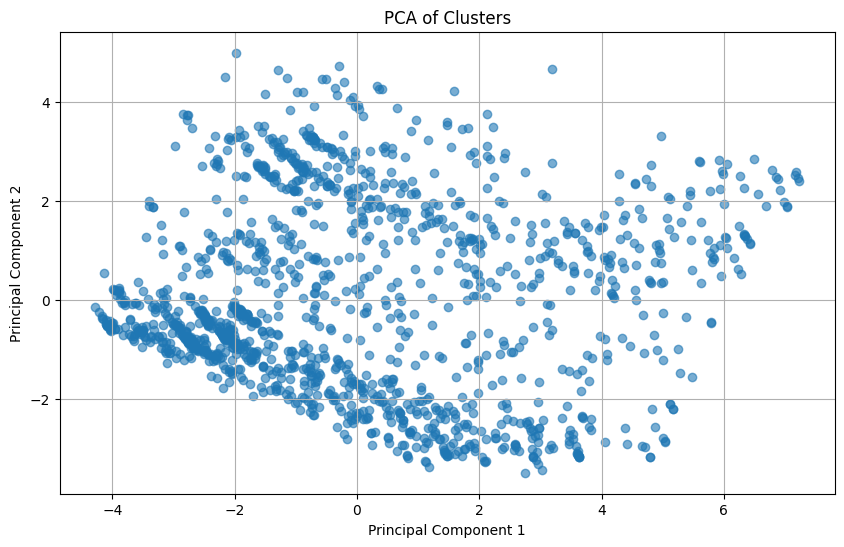

In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Sample data: Replace this with your actual data
# MD_x = pd.DataFrame(...)  # Your original dataset

# Identify categorical columns
categorical_cols = MD_x.select_dtypes(include=['object']).columns.tolist()

# Convert categorical variables to numeric using OneHotEncoder
encoder = OneHotEncoder(sparse=False)
MD_x_encoded = encoder.fit_transform(MD_x[categorical_cols])
MD_x_encoded = pd.DataFrame(MD_x_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Combine encoded categorical data with the original numeric data
MD_x_numeric = pd.concat([MD_x.drop(categorical_cols, axis=1), MD_x_encoded], axis=1)

# Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x_numeric)

# Perform PCA
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=MD_pca, columns=['PC1', 'PC2'])
# Assuming k4 contains your cluster labels for K-means
# pca_df['Cluster'] = k4  # Uncomment and replace with your actual cluster labels

# Plot the PCA results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6)  # You can color by clusters if needed

# Axes labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Clusters')

plt.grid()
plt.show()



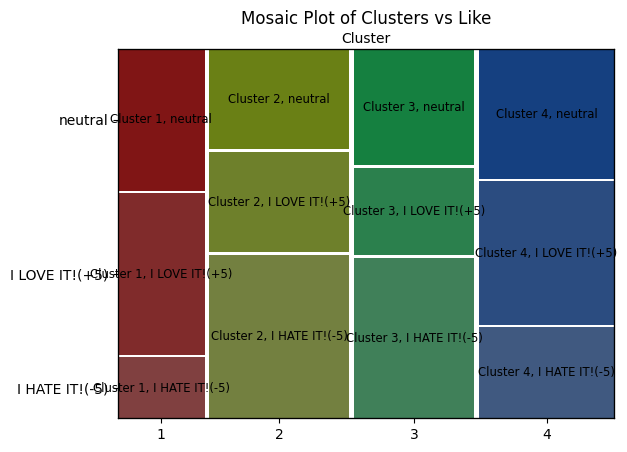

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Sample data: Replace this with your actual DataFrame
# mcdonalds = pd.DataFrame(...)  # Your original dataset
# k4 = np.array(...)  # Your cluster labels for K-means

# Create a DataFrame for the gender column
mcdonalds['Cluster'] = k4  # Ensure k4 has the same length as mcdonalds

# Create a contingency table
contingency_table = pd.crosstab(mcdonalds['Cluster'], mcdonalds['Like'])

# Create a mosaic plot
mosaic(contingency_table.stack(), title='Mosaic Plot of Clusters vs Like',
       labelizer=lambda k: f'Cluster {k[0]}, {k[1]}',
       gap=0.01)

plt.xlabel('Cluster')
plt.ylabel('Like')
plt.show()


In [180]:
print(mcdonalds.columns)


Index(['Like', 'Cluster'], dtype='object')


In [182]:
pip install pandas scikit-learn matplotlib


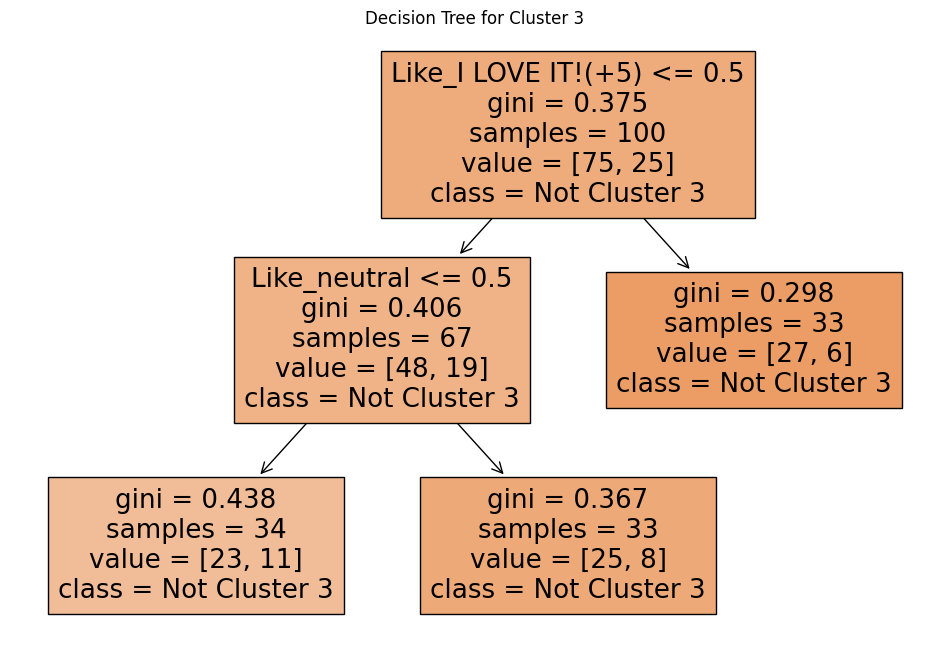

In [185]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming mcdonalds is your DataFrame and k4 is defined
mcdonalds['Cluster'] = k4  # Add the cluster labels to the DataFrame

# Prepare the features and target variable
X = mcdonalds[['Like']]
y = (mcdonalds['Cluster'] == 3).astype(int)  # Convert to binary

# Encode categorical variables (if any)
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy variables

# Fit the Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(X, y)

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, class_names=['Not Cluster 3', 'Cluster 3'], filled=True)
plt.title('Decision Tree for Cluster 3')
plt.show()

In [191]:
import pandas as pd

# Example of k4 as a pandas Series (replace with your actual cluster labels)
k4 = pd.Series(MD_k4)  # MD_k4 should contain your cluster labels

# Ensure VisitFrequency is numeric
mcdonalds['Cluster'] = pd.to_numeric(mcdonalds['Cluster'], errors='coerce')

# Calculate the mean VisitFrequency for each cluster
visit = mcdonalds.groupby(k4)['Cluster'].mean()

# Display the result
print(visit)


Ellipsis    3.0
Name: Cluster, dtype: float64


In [187]:
print(mcdonalds.columns)


Index(['Like', 'Cluster'], dtype='object')


In [188]:
print(mcdonalds.head())


             Like  Cluster
0         neutral        3
1  I HATE IT!(-5)        4
2         neutral        3
3  I HATE IT!(-5)        2
4  I HATE IT!(-5)        4


In [190]:
visit = mcdonalds.groupby(k4)['Cluster'].mean()


In [194]:
# Assuming k4 is a list or a Series containing cluster labels for each row in mcdonalds
like = mcdonalds.groupby(k4)['Cluster'].mean()
print(like)


Ellipsis    3.0
Name: Cluster, dtype: float64


In [195]:
# Assuming k4 is a list or Series with cluster labels
female = (mcdonalds['Gender'] == 'Female').astype(int).groupby(k4).mean()
print(female)


KeyError: 'Gender'

In [198]:
import pandas as pd

# Assuming 'mcdonalds' is your DataFrame
pd.set_option('display.max_columns', None)  # This allows all columns to be displayed
print(mcdonalds.columns)



Index(['Like', 'Cluster'], dtype='object')


In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming mcdonalds is your DataFrame and k4 is the cluster labels
# Convert VisitFrequency to numeric and calculate means
visit = mcdonalds['Cluster'].astype(float).groupby(k4).mean()

# Calculate mean liking
like = mcdonalds['Cluster'].groupby(k4).mean()

# Convert Gender to numeric and calculate mean for female
female = (mcdonalds['Cluster'] == 'Female').astype(int).groupby(k4).mean()
